In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
#SWE, ESP, FIN, DNK
country = 'FIN'

In [3]:
#take the data, change country with the .csv file il data
ocde_data = pd.read_csv('data/'+country+'.csv', dtype={'Value': np.float64}, usecols = ['TIME', 'Value'], parse_dates=True, date_parser=lambda date: pd.datetime.strptime(date, '%Y-%m'))

#Splitting traing/test
training = ocde_data[0:len(ocde_data)-26]
testing = ocde_data[-26:]

#Let's use the notation from the lecture
X = training.loc[:,'TIME'].values #Year became Date
y = training.loc[:, 'Value'].values #Time became Value
X = X.reshape(len(training),1)
#print(X[1][0])
#print(X)

In [4]:
# take the first year of the data
init = X[0][0].split('-')
init=[int(j) for j in init]
init = init[0]

#convert a date list into a numerical array
def date_to_num(list, len_base):
    var=[]
    x=[]
    for i in range(len(list)):
        # split the date into [year, mouth]
        var.append(list[i][0].split('-'))
        # converting string into integer
        var[i]=[int(j) for j in var[i]]
        # creating numerical dates
        x.append(var[i][0]+12*(var[i][0]-init)+var[i][1]-init)
    x = np.array(x)  
    x = x.reshape(len_base, 1)
    return x

In [5]:
x = date_to_num(X, len(training))

In [6]:
#we add the column of ones to X. Check scikit-learn documentation to see how this is achieved
poly = PolynomialFeatures(1)
x = poly.fit_transform(x)

In [7]:
def least_squares(X,y):
    X_t = np.transpose(X) #X^T
    X_t_X = X_t.dot(X)    #X^TX
    X_inv = inv(X_t_X)    #(#X^TX)^-1
    X_T_y = X_t.dot(y)    #X^Ty
    w = X_inv.dot(X_T_y)
    
    return w

In [8]:
w = least_squares(x,y)
print('Weights: ', w)

Weights:  [ 4.58451316 -0.02055041]


In [9]:
# estimates the MSE and the RSS
y_hat = np.sum(x*w,axis=1)

RSS = sum((y - y_hat)*(y - y_hat))
MSE = RSS/len(training)

print('RSS: ', RSS, '\nMSE: ', MSE)

RSS:  202.90053798788773 
MSE:  0.8977899910968483


In [10]:
X_test = testing.loc[:,'TIME'].values
y_test = testing.loc[:, 'Value'].values
X_test = X_test.reshape(len(testing),1)
#print(X_test)
x_test = date_to_num(X_test, len(testing))
#print(x_test)

In [11]:
x_test = poly.fit_transform(x_test)

y_hat_test = np.sum(x_test*w,axis=1)
MSE = sum((y_test - y_hat_test)*(y_test - y_hat_test))/len(testing)

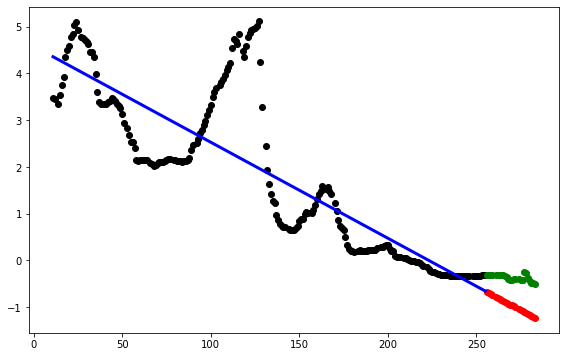

In [12]:
plt.rcParams['figure.figsize'] = [9.5, 6]
plt.scatter(x[:,1], y,  color='black')
plt.plot(x[:,1], y_hat,  color='blue', linewidth=3)
plt.scatter(x_test[:,1], y_hat_test, color='red')
plt.scatter(x_test[:,1], y_test,  color='green')

In [13]:
print('MSE: ', MSE)
print('Predicted times [2020-09, 2020-10]: ', y_hat_test)
print('Real times [2020-09, 2020-10]: ', y_test)

MSE:  0.3661180411465365
Predicted times [2020-09, 2020-10]:  [-0.67639075 -0.69694116 -0.71749157 -0.73804197 -0.77914278 -0.79969319
 -0.8202436  -0.840794   -0.86134441 -0.88189481 -0.90244522 -0.92299563
 -0.94354603 -0.96409644 -0.98464684 -1.00519725 -1.04629806 -1.06684847
 -1.08739887 -1.10794928 -1.12849968 -1.14905009 -1.1696005  -1.1901509
 -1.21070131 -1.23125171]
Real times [2020-09, 2020-10]:  [-0.3188 -0.3177 -0.3164 -0.3119 -0.308  -0.3084 -0.3092 -0.3105 -0.3119
 -0.3289 -0.3649 -0.4077 -0.4176 -0.4129 -0.4013 -0.3947 -0.3911 -0.4088
 -0.4166 -0.254  -0.272  -0.376  -0.4441 -0.4797 -0.4914 -0.5085]


**Fitting a higher order model**

In [14]:
#get the data
X = training.loc[:,'TIME'].values 
y = training.loc[:, 'Value'].values 
X = X.reshape(len(training),1)
x = date_to_num(X, len(training))


X_test = testing.loc[:,'TIME'].values
y_test = testing.loc[:, 'Value'].values
X_test = X_test.reshape(len(testing),1)
x_test = date_to_num(X_test, len(testing))

FOR POWER 1 :
MSE:  0.3661180411465341
Predicted times [2020-09, 2020-10]:  [-0.67639075 -0.69694116 -0.71749157 -0.73804197 -0.77914278 -0.79969319
 -0.8202436  -0.840794   -0.86134441 -0.88189481 -0.90244522 -0.92299563
 -0.94354603 -0.96409644 -0.98464684 -1.00519725 -1.04629806 -1.06684847
 -1.08739887 -1.10794928 -1.12849968 -1.14905009 -1.1696005  -1.1901509
 -1.21070131 -1.23125171]
Real times [2020-09, 2020-10]:  [-0.3188 -0.3177 -0.3164 -0.3119 -0.308  -0.3084 -0.3092 -0.3105 -0.3119
 -0.3289 -0.3649 -0.4077 -0.4176 -0.4129 -0.4013 -0.3947 -0.3911 -0.4088
 -0.4166 -0.254  -0.272  -0.376  -0.4441 -0.4797 -0.4914 -0.5085]
FOR POWER 2 :
MSE:  1.0714619944274741
Predicted times [2020-09, 2020-10]:  [-0.98938238 -1.01759381 -1.0458674  -1.07420315 -1.13106115 -1.15958339
 -1.18816779 -1.21681436 -1.24552308 -1.27429397 -1.30312703 -1.33202224
 -1.36097962 -1.38999916 -1.41908086 -1.44822473 -1.50669895 -1.5360293
 -1.56542181 -1.59487649 -1.62439333 -1.65397233 -1.6836135  -1.71331

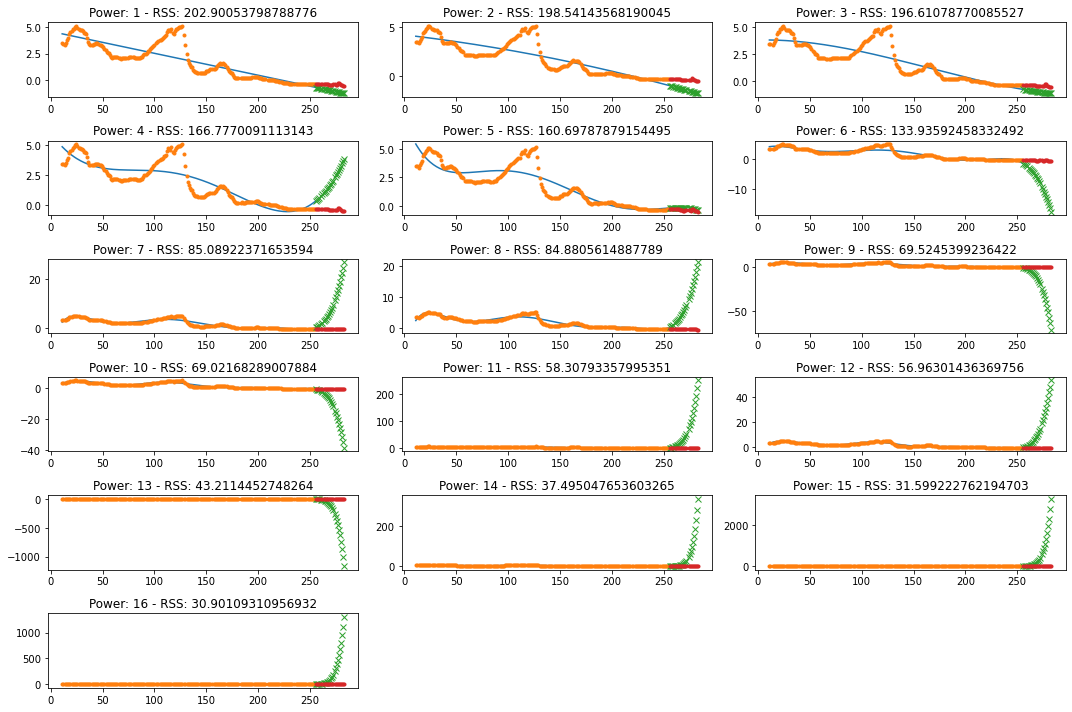

In [203]:
#generate the polynomial features with scikit-learn
max_power = 17
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = [15, 10]
for power in range(1,max_power):
    poly = PolynomialFeatures(power)
    X_train = poly.fit_transform(x)
    
    #Feature scaling 
    scaler = StandardScaler(copy=True)
    scaler.fit(X_train[:,1:])
    X_train[:,1:] = scaler.transform(X_train[:,1:])

    #We will use scikit-learn implementation of the linear regressor
    regr = linear_model.LinearRegression(fit_intercept=False) 
    # Train the model using the training set
    regr.fit(X_train, y)
    
    y_hat = regr.predict(X_train)

    #We apply the scaling to the test data using the transform obtained from the training data 
    X_test_poly =  poly.fit_transform(x_test)
    scaled_test = X_test_poly
    X_test_poly[:,1:] = scaler.transform(X_test_poly[:,1:])    
    
    #Predict 2012, 2016    
    y_hat_test = regr.predict(X_test_poly)

    #plotting
    plt.subplot(6,3,0+power) #Non-elegant way to assign spaces in the subplot
    plt.tight_layout()
    plt.plot(np.transpose(x[:,0]),y_hat)
    plt.plot(x[:,0],y,'.')
    plt.plot(x_test[:,0],y_hat_test,'x')
    plt.plot(x_test[:,0],y_test,'.')
    plt.title('Power: ' + str(power) + ' - RSS: ' +  str(sum((y - y_hat)*(y - y_hat))))
    
    print('FOR POWER', power, ':')
    MSE = sum((y_test - y_hat_test)*(y_test - y_hat_test))/len(testing)
    print('MSE: ', MSE)
    print('Predicted times [2020-09, 2020-10]: ', y_hat_test)
    print('Real times [2020-09, 2020-10]: ', y_test)